### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [9]:
data = pd.read_csv('data/coupons.csv')

In [11]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [13]:
# Information about Dataframe: Column Name, # of Non-Null values, Data Type
data.info()


#Profiling the data to review how many values of each type exist

for field in data.columns:
    print("\n")
    print(f"Value counts for {field}")
    print(data[field].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [15]:
#Describing data to understand the data statistics


data.describe()
    

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000




Count of Missing Values in Data
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64




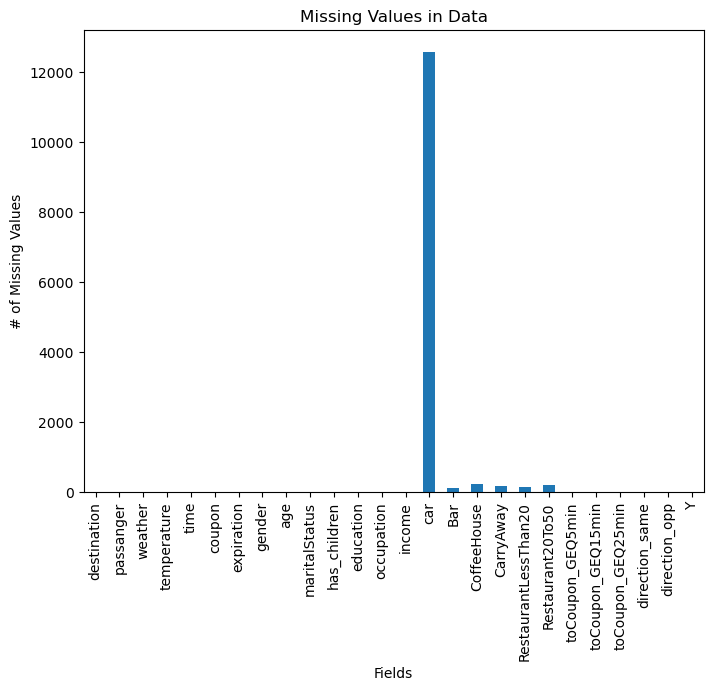



Details of Duplicate Rows in Data
# of duplicate rows: 74


In [13]:
# Determine Missing values
print("\n")
print("Count of Missing Values in Data")

missing_values = data.isnull().sum()
print(missing_values)

print("\n")
plt.figure(figsize=(8, 6))
missing_values.plot(kind='bar')
plt.title('Missing Values in Data')
plt.xlabel('Fields')
plt.ylabel('# of Missing Values')
plt.show()

# Determine Duplicate Data
print("\n")
print("Details of Duplicate Rows in Data")
duplicate_values = data.duplicated().sum()
print(f'# of duplicate rows: {duplicate_values}')

3. Decide what to do about your missing data -- drop, replace, other...

In [17]:
# Car field has lot of missing values, also does not seem relevant for our analysis. We will delete this field.

df_without_car = data.copy()

df_without_car = df_without_car.drop(columns =['car'])

# Number of nullrows in the new data set

df_with_nulls = df_without_car.isnull().any(axis=1).sum()

print(f" # of Null Rows {df_with_nulls}:")




 # of Null Rows 605:


In [21]:
# Drop the Null Rows as they are signifcantly low in number

final_clean_df = df_without_car.dropna()

# Also remove the 74 duplicate rows

final_clean_df = final_clean_df.drop_duplicates()

# # of rows in the new DataFrame
print(f"# of rows in final dataset {final_clean_df.shape[0]}")


# of rows in final dataset 12007


4. What proportion of the total observations chose to accept the coupon? 



In [23]:
# We need to count the # of records with Y = 1 in the dataset and calculate this data as a proportion of the entire dataset

total_num_records = final_clean_df.shape[0]
coupon_accepted_records = final_clean_df['Y'].sum()

acceptance_proportion = coupon_accepted_records/total_num_records

print(f"Proportion of the total observations that chose to accept the coupon is {acceptance_proportion:.2%}")



Proportion of the total observations that chose to accept the coupon is 56.84%



5. Use a bar plot to visualize the `coupon` column.

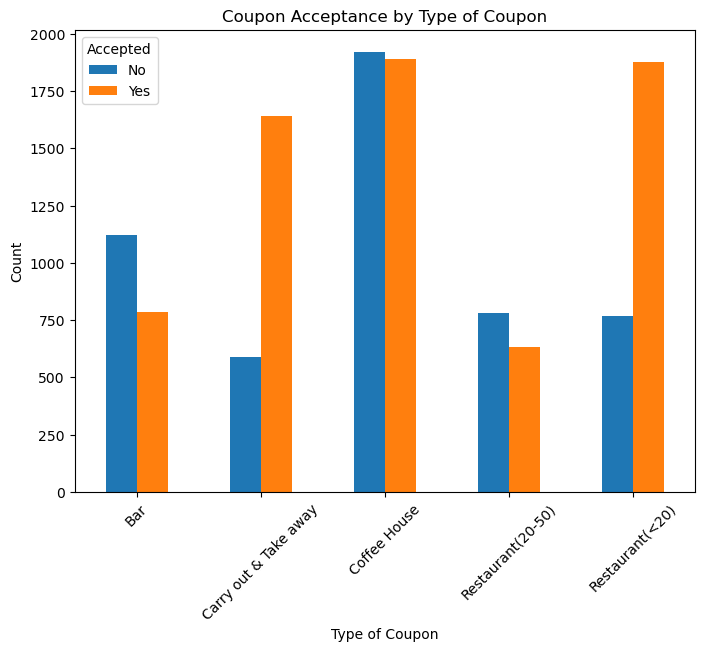

In [25]:

# Determine the count of each type of coupon by acceptance
coupons_data = final_clean_df.groupby(['coupon', 'Y']).size().unstack()

# Plot the stacked bar plot
coupons_data.plot(kind='bar',figsize=(8, 6))
plt.title('Coupon Acceptance by Type of Coupon')
plt.xlabel('Type of Coupon')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Accepted', labels=['No', 'Yes'])
plt.show()

6. Use a histogram to visualize the temperature column.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


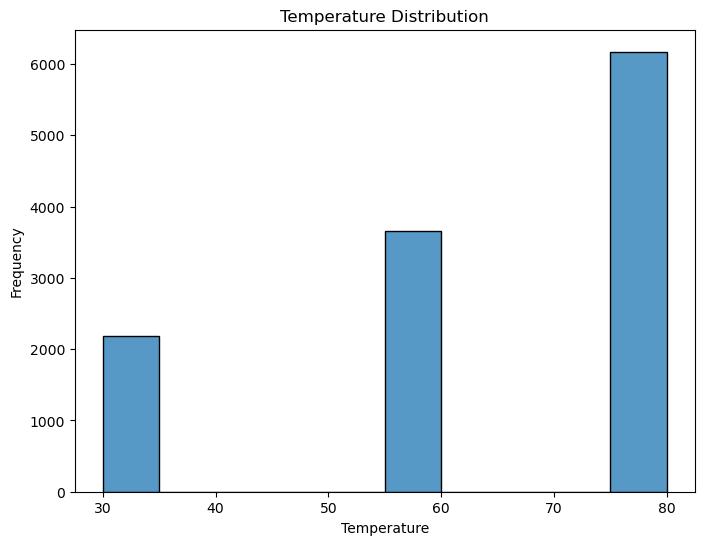

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


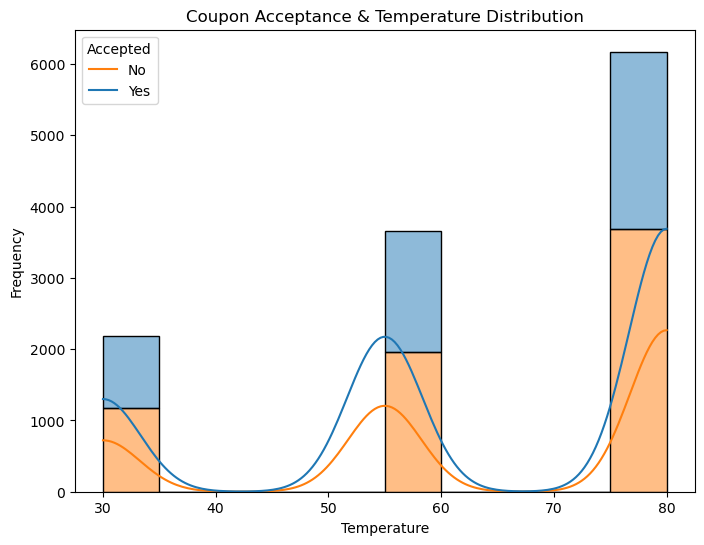

In [29]:
# Histogram of Temperature Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=final_clean_df, x='temperature',bins=10)
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Histogram of Temperature Distribution when coupon is accepted

plt.figure(figsize=(8, 6))
sns.histplot(data=final_clean_df, x='temperature', hue='Y', bins=10, kde = True, multiple="stack")
plt.title('Coupon Acceptance & Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(title='Accepted', labels=['No', 'Yes'])
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [31]:
# New DataFrame that contain just the bar coupons
bar_coupons_df = final_clean_df[final_clean_df['coupon'] == 'Bar']

# Print the new DataFrame
print(bar_coupons_df)

# Shape/ # of records in bar coupons dataframe
print(f"Number of records in bar_coupons_df {bar_coupons_df.shape[0]}")

           destination  passanger weather  temperature  time coupon  \
24     No Urgent Place  Friend(s)   Sunny           80  10AM    Bar   
35                Home      Alone   Sunny           55   6PM    Bar   
39                Work      Alone   Sunny           55   7AM    Bar   
46     No Urgent Place  Friend(s)   Sunny           80  10AM    Bar   
57                Home      Alone   Sunny           55   6PM    Bar   
...                ...        ...     ...          ...   ...    ...   
12663  No Urgent Place  Friend(s)   Sunny           80  10PM    Bar   
12664  No Urgent Place  Friend(s)   Sunny           55  10PM    Bar   
12667  No Urgent Place      Alone   Rainy           55  10AM    Bar   
12670  No Urgent Place    Partner   Rainy           55   6PM    Bar   
12682             Work      Alone   Snowy           30   7AM    Bar   

      expiration gender age maritalStatus  ...  CoffeeHouse CarryAway  \
24            1d   Male  21        Single  ...        less1       4~8   
3

2. What proportion of bar coupons were accepted?


Proportion of Bar Coupons is 41.19%


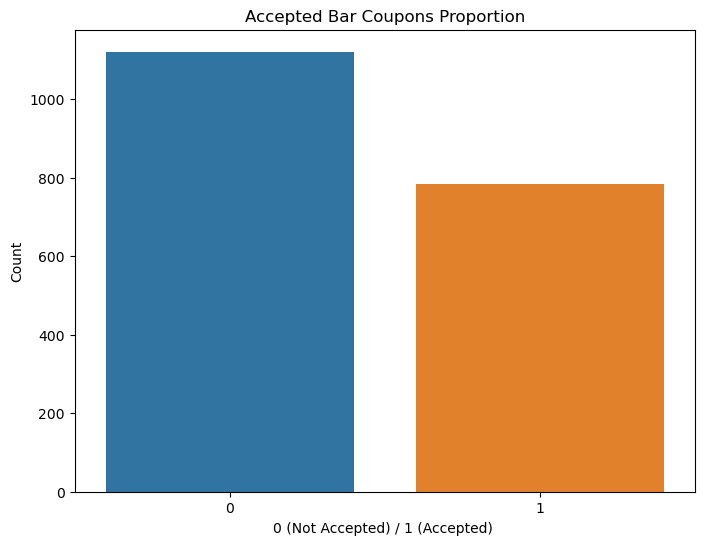

In [33]:
#Let's find the # of bar coupons accepted
no_bar_coupons = bar_coupons_df.shape[0]
accepted_bar_coupons = bar_coupons_df['Y'].sum()


proportion_bar_coupons = accepted_bar_coupons/no_bar_coupons
print (f"Proportion of Bar Coupons is {proportion_bar_coupons:.2%}")

bar_coupons_acceptance = bar_coupons_df['Y'].value_counts()

plt.figure(figsize=(8,6))
sns.barplot(x=bar_coupons_acceptance.index, y=bar_coupons_acceptance.values)
plt.title('Accepted Bar Coupons Proportion')
plt.xlabel('0 (Not Accepted) / 1 (Accepted) ')
plt.ylabel('Count')
plt.show()


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [35]:
# Those who went to bar 3 or fewer times and more than 3 times

three_or_fewer_count =  bar_coupons_df[bar_coupons_df['Bar'].isin(['never', 'less1', '1~3'])]
greater_than_three_count = bar_coupons_df[bar_coupons_df['Bar'].isin(['4~8', 'gt8'])]

# Acceptance rate for three or fewer visits & more than 4 visits

acceptance_three_or_fewer = three_or_fewer_count['Y'].mean()

acceptance_three_or_more = greater_than_three_count['Y'].mean()


print(f"Acceptance Rate for three or fewer visits {acceptance_three_or_fewer:.2%}")
print(f"Acceptance Rate for three or more visits {acceptance_three_or_more:.2%}")


Acceptance Rate for three or fewer visits 37.24%
Acceptance Rate for three or more visits 76.17%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [37]:
# Those who went to bar 3 or fewer times and more than 3 times

one_or_more_over_25 = bar_coupons_df[(bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_coupons_df['age'] > '25')]
all_other = bar_coupons_df[~(bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_coupons_df['age'] > '25')]


# Acceptance rate for three or fewer visits & more than 4 visits

acceptance_grp1 = one_or_more_over_25['Y'].mean()
acceptance_grp2 = all_other['Y'].mean()


print(f"Acceptance Rate for drivers with 1+ visit and who are >25 Years {acceptance_grp1:.2%}")
print(f"Acceptance Rate for all other drivers {acceptance_grp2:.2%}")


Acceptance Rate for drivers with 1+ visit and who are >25 Years 68.28%
Acceptance Rate for all other drivers 27.65%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [39]:
drivers_1 = bar_coupons_df[(bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])) 
& (bar_coupons_df['passanger'] != 'Kid(s)') & (~bar_coupons_df['occupation'].isin(['Farming Fishing & Forestry']))]

drivers_2_all_others = bar_coupons_df[~(bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])) 
& (bar_coupons_df['passanger'] != 'Kid(s)') & (~bar_coupons_df['occupation'].isin(['Farming Fishing & Forestry']))]

acceptance_rate_drivers_1 = drivers_1['Y'].mean()
acceptance_rate_drivers_2 = drivers_2_all_others['Y'].mean()


print(f"Acceptance Rate for drivers who go to bar more than once have no kid passesngers and have occupations other than farming, fishing or forestry {acceptance_rate_drivers_1:.2%}")
print(f"Acceptance Rate for all other drivers {acceptance_rate_drivers_2:.2%}")


Acceptance Rate for drivers who go to bar more than once have no kid passesngers and have occupations other than farming, fishing or forestry 70.94%
Acceptance Rate for all other drivers 31.07%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [41]:
case_1 = final_clean_df[(final_clean_df['Bar'].isin(['1~3', '4~8', 'gt8'])) 
& (final_clean_df['passanger'] != 'Kid(s)') & (final_clean_df['maritalStatus'] != 'Widowed')]

case_2 = final_clean_df[(final_clean_df['Bar'].isin(['1~3', '4~8', 'gt8'])) 
& (final_clean_df['age'] < '30') ]

case_3 = final_clean_df[(final_clean_df['RestaurantLessThan20'].isin(['4~8', 'gt8'])) 
& (final_clean_df['income'] < '$50000') ]

acceptance_rate_case_1 = case_1['Y'].mean()
acceptance_rate_case_2 = case_2['Y'].mean()
acceptance_rate_case_3 = case_3['Y'].mean()

print(f"Acceptance Rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed {acceptance_rate_case_1:.2%}")
print(f"Acceptance Rate for drivers who go to bars more than once a month and are under the age of 30 {acceptance_rate_case_2:.2%}")
print(f"Acceptance Rate for drivers who go cheap restaurants more than 4 times a month and income is less than 50K {acceptance_rate_case_3:.2%}")


Acceptance Rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed 62.41%
Acceptance Rate for drivers who go to bars more than once a month and are under the age of 30 62.90%
Acceptance Rate for drivers who go cheap restaurants more than 4 times a month and income is less than 50K 60.17%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Hypothesis about drivers who accepted bar coupons
1. People who visit bars  frequenty are more likely to accept coupons. These visitors can be termed as socially more active and we can deduce that socially active people are more likely to accept bar coupons. 
2. Younger drivers less than 30 are more likely to accept coupons.
3. Based onthe analysis that people  who work in farming, fishing and forestry ar less likely to accept bar coupons we can deduce that urban drivers are more likely to accept coupons than rural drivers.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [43]:
# Let's look at the data for carry out and takeaway only
carry_out_takeaway_data = final_clean_df[final_clean_df['coupon'] == 'Carry out & Take away']

# Numbe of rows in the data
num_rows = carry_out_takeaway_data.shape[0]

print(f" Number of records with Carry Out & Takeaway Coupons is {num_rows}")

 Number of records with Carry Out & Takeaway Coupons is 2233


In [103]:
# Lets get some more details of other variables such as destination, time of day, count of passengers, weather and temperature  
# and let's determine what variables we should use for further analysis

# Determine the value counts for destination, time of day, and passengers, weather and temperature
destination_counts = carry_out_takeaway_data['destination'].value_counts()
passenger_counts = carry_out_takeaway_data['passanger'].value_counts()
weather_counts = carry_out_takeaway_data['weather'].value_counts()
temperature_counts = carry_out_takeaway_data['temperature'].value_counts()
time_of_day_counts = carry_out_takeaway_data['time'].value_counts()

print(f"Value counts for destination {destination_counts}")
print(f"\nValue counts for passengers {passenger_counts}")
print(f"\nValue counts for weather {weather_counts}")
print(f"\nValue counts for temperature {temperature_counts}")
print(f"\nValue counts for time of day {time_of_day_counts}")

Value counts for destination destination
No Urgent Place    927
Work               688
Home               618
Name: count, dtype: int64

Value counts for passengers passanger
Alone        1297
Friend(s)     705
Kid(s)        141
Partner        90
Name: count, dtype: int64

Value counts for weather weather
Sunny    1644
Rainy     299
Snowy     290
Name: count, dtype: int64

Value counts for temperature temperature
80    977
30    710
55    546
Name: count, dtype: int64

Value counts for time of day time
7AM     688
10AM    488
10PM    437
6PM     411
2PM     209
Name: count, dtype: int64


In [45]:
# Calculate Acceptance Rates for these variables

# Acceptance rates based for destination
destination_acceptance_rate = carry_out_takeaway_data.groupby('destination')['Y'].mean()
# Acceptance rates based for passengers
passenger_acceptance_rate = carry_out_takeaway_data.groupby('passanger')['Y'].mean()
# Acceptance rates based for weather
weather_acceptance_rate = carry_out_takeaway_data.groupby('weather')['Y'].mean()
# Acceptance rates based for time of day
temperature_acceptance_rate = carry_out_takeaway_data.groupby('temperature')['Y'].mean()
# Changing the datatype of the index of temperature_acceptance_rate from int to string so that we can visualize
temperature_acceptance_rate.index = temperature_acceptance_rate.index.astype(str)

# Acceptance rates based for time of day
time_of_day_acceptance_rate = carry_out_takeaway_data.groupby('time')['Y'].mean()


print(f"Acceptance Rate for Destination {destination_acceptance_rate}")
print(f"\nAcceptance Rate based on Passengers {passenger_acceptance_rate}")
print(f"\nAcceptance Rate based on Weather {weather_acceptance_rate}")
print(f"\nAcceptance rate for temperature {temperature_acceptance_rate}")
print(f"\nAcceptance Rate for time of day {time_of_day_acceptance_rate}")


Acceptance Rate for Destination destination
Home               0.791262
No Urgent Place    0.760518
Work               0.652616
Name: Y, dtype: float64

Acceptance Rate based on Passengers passanger
Alone        0.729375
Friend(s)    0.758865
Kid(s)       0.695035
Partner      0.711111
Name: Y, dtype: float64

Acceptance Rate based on Weather weather
Rainy    0.608696
Snowy    0.713793
Sunny    0.762774
Name: Y, dtype: float64

Acceptance rate for temperature temperature
30    0.759155
55    0.719780
80    0.727738
Name: Y, dtype: float64

Acceptance Rate for time of day time
10AM    0.698770
10PM    0.766590
2PM     0.866029
6PM     0.819951
7AM     0.652616
Name: Y, dtype: float64


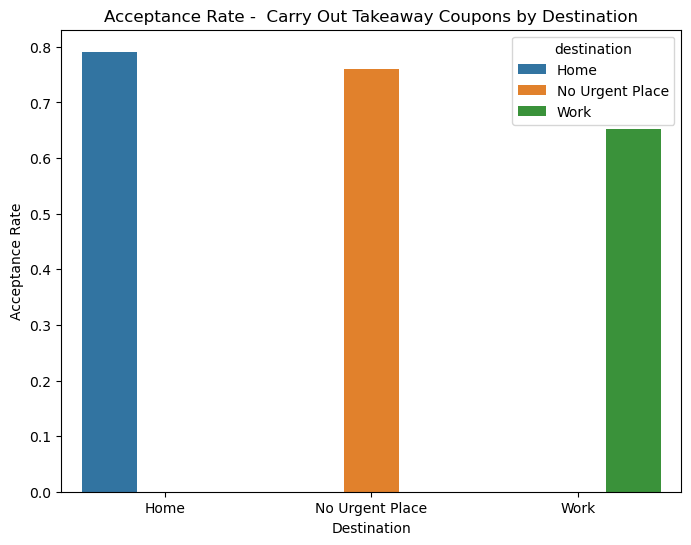

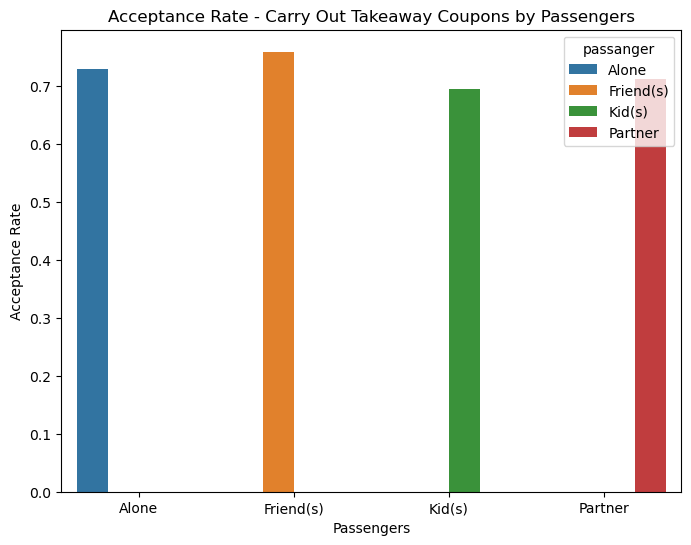

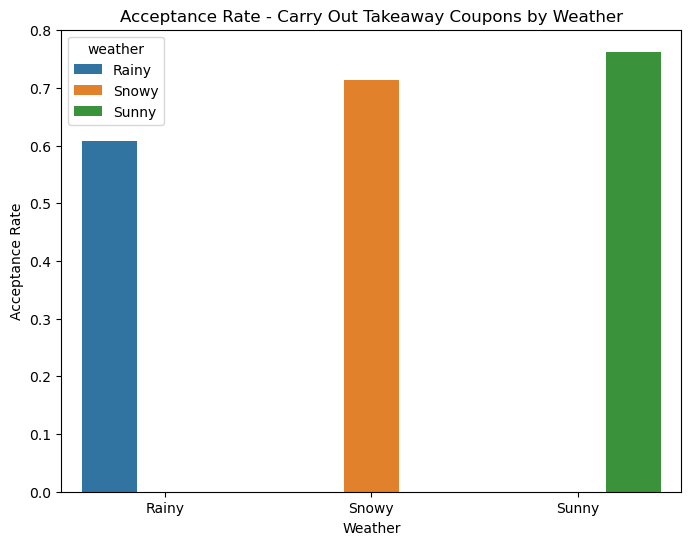

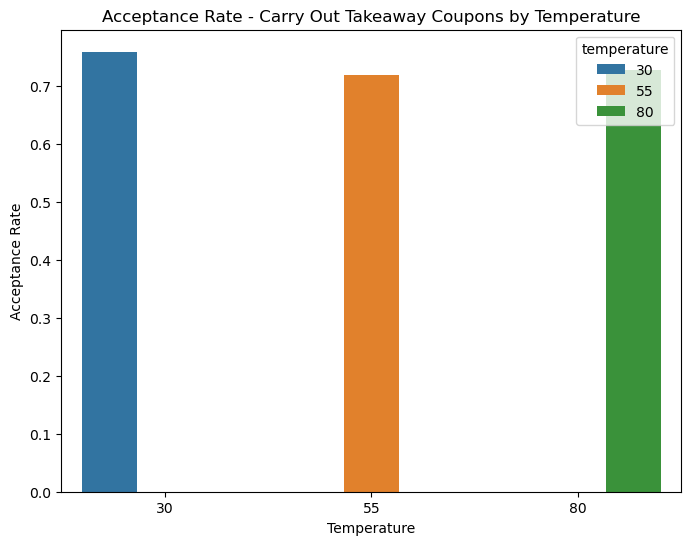

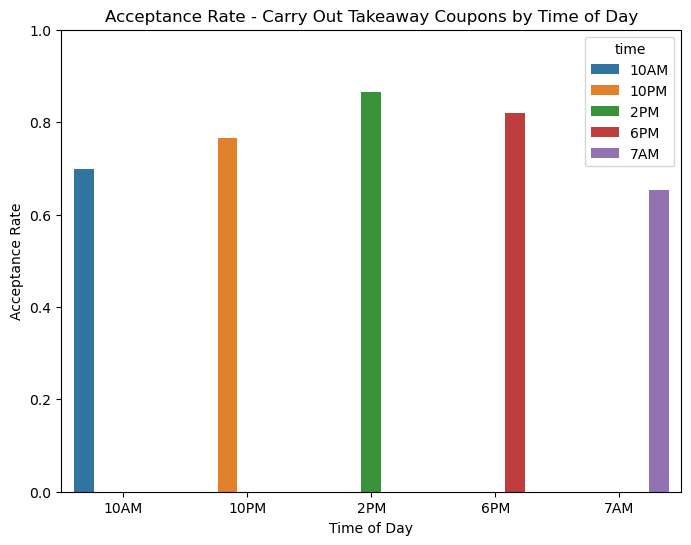

In [111]:
# Plot acceptance rates by destination
plt.figure(figsize=(8, 6))
sns.barplot(x=destination_acceptance_rate.index, y=destination_acceptance_rate.values,hue=destination_acceptance_rate.index)
plt.title('Acceptance Rate -  Carry Out Takeaway Coupons by Destination')
plt.xlabel('Destination')
plt.ylabel('Acceptance Rate')
plt.show()

# Plot acceptance rates by passengers
plt.figure(figsize=(8, 6))
sns.barplot(x=passenger_acceptance_rate.index, y=passenger_acceptance_rate.values, hue=passenger_acceptance_rate.index)
plt.title('Acceptance Rate - Carry Out Takeaway Coupons by Passengers')
plt.xlabel('Passengers')
plt.ylabel('Acceptance Rate')
plt.show()

# Plot acceptance rates by Weather
plt.figure(figsize=(8, 6))
sns.barplot(x=weather_acceptance_rate.index, y=weather_acceptance_rate.values, hue=weather_acceptance_rate.index)
plt.title('Acceptance Rate - Carry Out Takeaway Coupons by Weather')
plt.xlabel('Weather')
plt.ylabel('Acceptance Rate')
plt.show()

# Plot acceptance rates by temperature
plt.figure(figsize=(8, 6))
sns.barplot(x=temperature_acceptance_rate.index, y=temperature_acceptance_rate.values, hue=temperature_acceptance_rate.index)
plt.title('Acceptance Rate - Carry Out Takeaway Coupons by Temperature')
plt.xlabel('Temperature')
plt.ylabel('Acceptance Rate')
plt.show()

# Plot acceptance rates by time of day
plt.figure(figsize=(8, 6))
sns.barplot(x=time_of_day_acceptance_rate.index, y=time_of_day_acceptance_rate.values, hue=time_of_day_acceptance_rate.index)
plt.title('Acceptance Rate - Carry Out Takeaway Coupons by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.show()



#Hypothesis
1. Acceptance rate of take away coupons is high when destination is home or no urgent place
2. Passengers in the car does not seem to have much impact on acceptance rate
3. Acceptance rate is high when the weather is Sunny and low when it is rainy.
4. Temperature does not have significant impact on accpetance rate
5. Acceptance rate is highest at 2 PM and 6 PM
